In [1]:
import os
import pathlib
import json
from read_data import *

In [2]:
data = process_data()

In [18]:
main_dir = str(pathlib.Path.cwd().parents[0])
processed_dir_name = "processed_dir"
processed_dir_path = os.path.join(main_dir, processed_dir_name)
os.mkdir(processed_dir_path)

for dataset in data:
    new_csv = data[dataset]["dat"]
    csv_name = dataset + "_processed_data.csv"
    json_name = dataset + "_processed_hdr.json"
    new_csv.to_csv(os.path.join(processed_dir_path, csv_name), header=1, index=False)

    with open(os.path.join(processed_dir_path, json_name), 'w', encoding='utf-8') as f:
        hdr_dict = data[dataset]["hdr"].to_dict()
        hdr_dict["date_time"] = str(hdr_dict["date_time"])
        json.dump(hdr_dict, f, indent=4)
    

In [3]:
import ruptures as rpt

In [7]:
def calculating_changepoints(data, data_set,feature,nchp,xlabel,ylabel,title):
    dat = data[data_set]["dat"]
    feature_data = dat[feature]
    algo = rpt.Window(model="l2",min_size=50000).fit(feature_data.values)
    my_bkps = algo.predict(n_bkps=nchp)
    change_point_indexes = [x - 1 for x in my_bkps ]
    change_point_indexes
    df = dat['time']
    x_values = df.iloc[change_point_indexes]    
    plot_change_points(dat,x_values,data_set,feature,xlabel,ylabel,title)
    return x_values

def plot_change_points(data, result, data_set, feature,xlabel,ylabel,title):
    #result.plot()
    x_value = data['time']
    y_value = data[feature]
    #rpt.display(data.values,result)
    plt.figure(figsize=(10, 6))
    plt.plot(x_value.values, y_value.values)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(feature)
    for xc in result:
        plt.axvline(x=xc,color='red')

In [179]:
ch1_moment = pd.DataFrame(data["V2_00001"]["dat"]["CH1_Moment"])
ch1_moment.index = data["V2_00001"]["dat"]["time"]
ch1_moment.index = pd.to_datetime(ch1_moment.index, unit='s')

In [180]:
ch1_moment_sampled = ch1_moment.resample('5ms').mean()
ch1_moment_sampled = ch1_moment_sampled.interpolate(method='linear')
len(ch1_moment_sampled)

58300

In [181]:
import ruptures as rpt

In [183]:
algo = rpt.Binseg(model="normal").fit(ch1_moment_sampled.values)


c:\Users\Raafe\AppData\Local\Programs\Python\Python38\lib\site-packages\ruptures\costs\costnormal.py:27: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  warnings.warn(


In [184]:
result = algo.predict(n_bkps=3)


breaks_rpt = []
for i in result:
    breaks_rpt.append(ch1_moment_sampled.index[i-1])
breaks_rpt = pd.to_datetime(breaks_rpt)

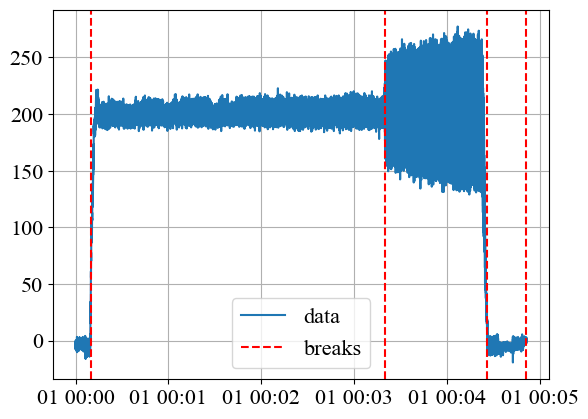

In [185]:
plt.plot(ch1_moment_sampled, label='data')
print_legend = True
for i in breaks_rpt:
    if print_legend:
        plt.axvline(i, color='red',linestyle='dashed', label='breaks')
        print_legend = False
    else:
        plt.axvline(i, color='red',linestyle='dashed')
plt.grid()
plt.legend()
plt.show()

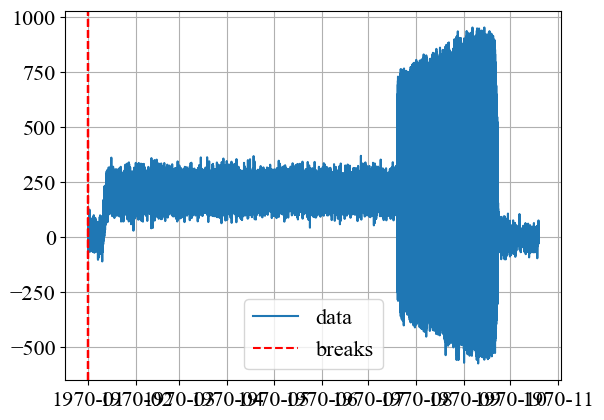

In [190]:
ch1_moment = pd.DataFrame(data["V2_00001"]["dat"]["CH1_Moment"])
ch1_moment.index = data["V2_00001"]["dat"]["time"]
algo = rpt.BottomUp(model="normal",min_size=20000).fit(ch1_moment.values)
my_bkps = algo.predict(n_bkps=5)

breaks_rpt = []
for i in my_bkps:
    breaks_rpt.append(ch1_moment.index[i-1])
breaks_rpt = pd.to_datetime(breaks_rpt)

plt.plot(ch1_moment, label='data')
print_legend = True
for i in breaks_rpt:
    if print_legend:
        plt.axvline(i, color='red',linestyle='dashed', label='breaks')
        print_legend = False
    else:
        plt.axvline(i, color='red',linestyle='dashed')
plt.grid()
plt.legend()
plt.show()